In [1]:
%matplotlib inline
import gym  # open ai gym
#mport pybulletgym # register PyBullet enviroments with open ai gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt

from pyvirtualdisplay import Display
Display(visible=0, size=(960, 720)).start()  

In [2]:
env = gym.make('CartPole-v0')
## State
# Cart position [-4.8, 4.8]
# Velocity [-Inf, Inf]
# Pole Angle [-0.418 rad (-24 deg), 0.418 rad (24 deg)]
# Pole Angular Velocity [-Inf, Inf]

## Action
# 0 left
# 1 right

In [3]:
env.env.tau = 0.005

In [4]:
import torch
import norse.torch as nn

In [5]:
state = None

In [6]:
def ask_network(observation, state=None):
    observation = torch.tensor(observation)
    action, state = model(observation, state)
    return 0 if action > 0 else 1, state

In [7]:
linear = torch.nn.Linear(4, 1, bias=False)
model = nn.SequentialState(
    linear,
    nn.LICell()
).eval()

In [8]:
linear.weight = torch.nn.Parameter(torch.Tensor([[0.1, 0.1, 0.1, 0.1]]))

In [9]:
linear.weight = torch.nn.Parameter(torch.Tensor([[2, 1, 0., 0.]]))

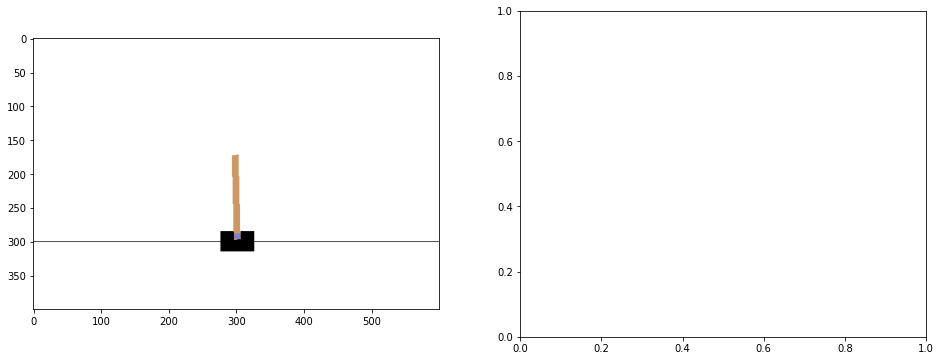

/home/jens/norse-rl/.venv/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


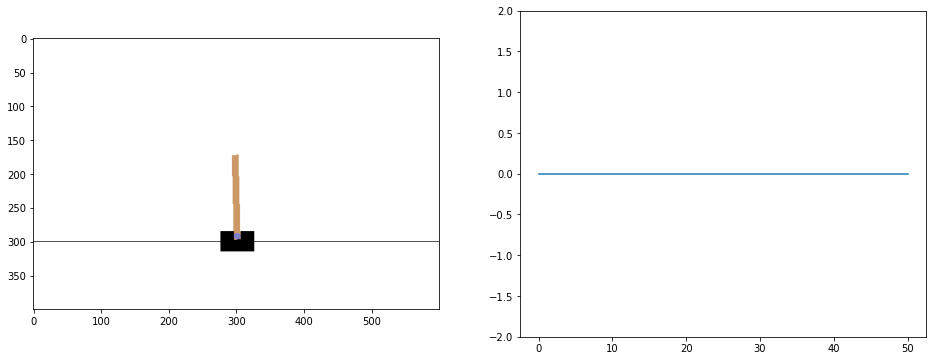

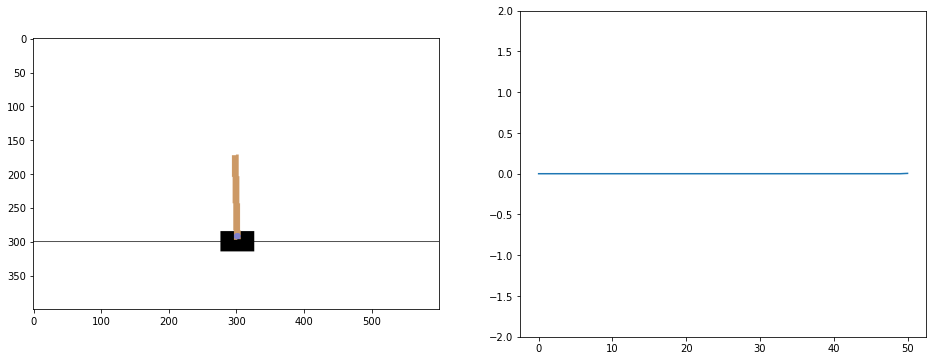

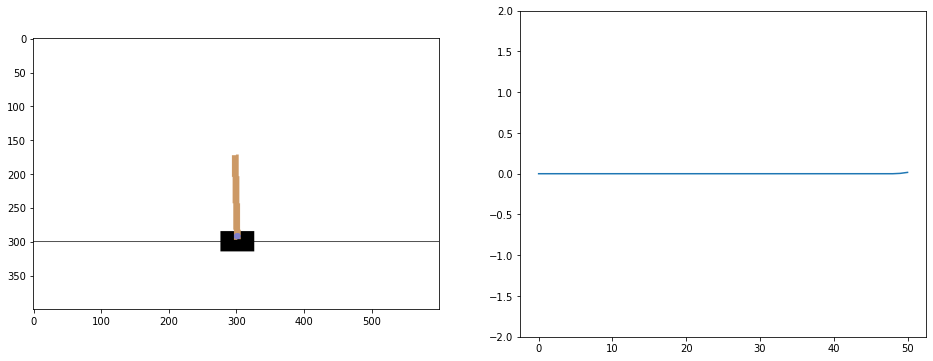

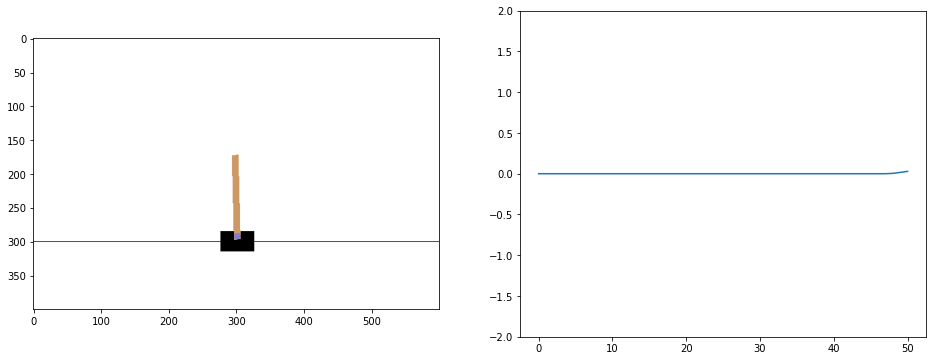

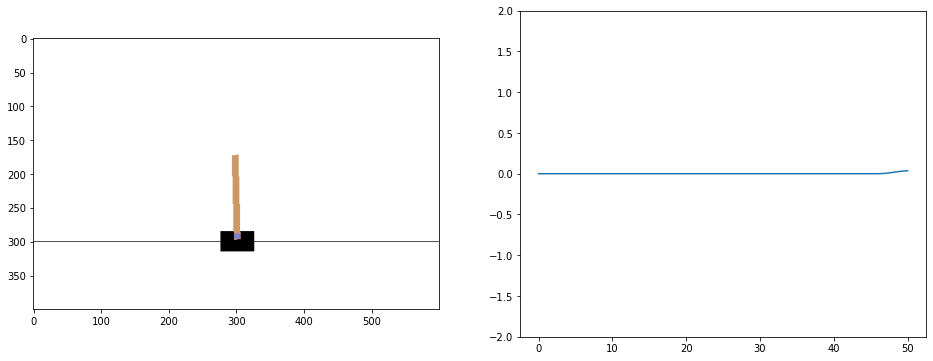

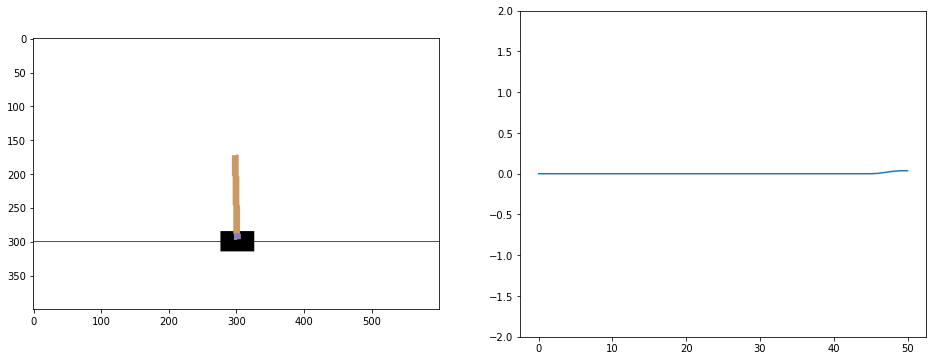

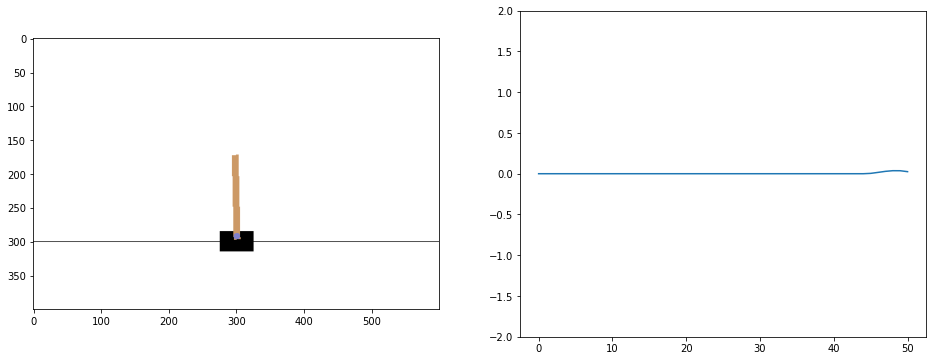

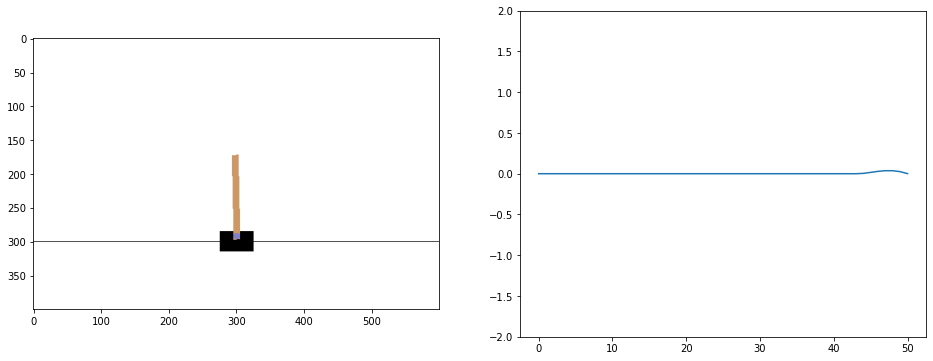

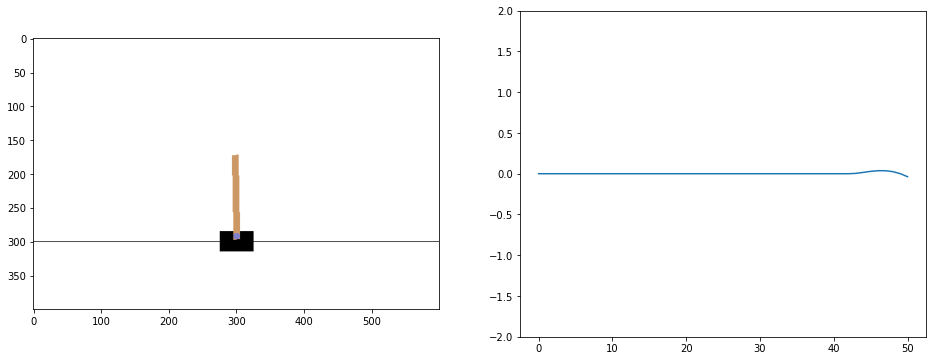

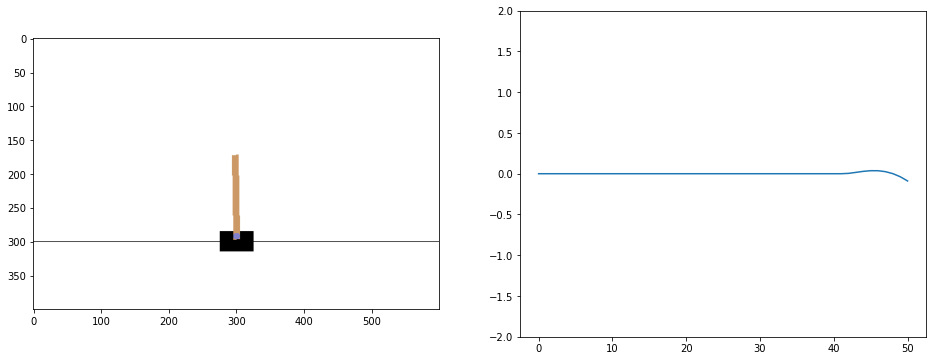

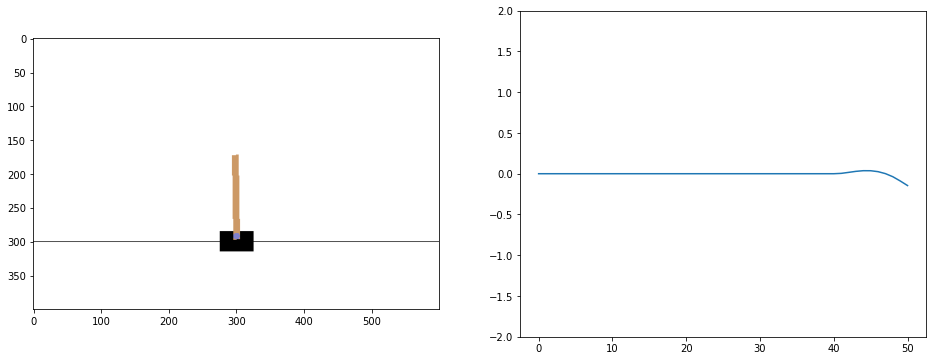

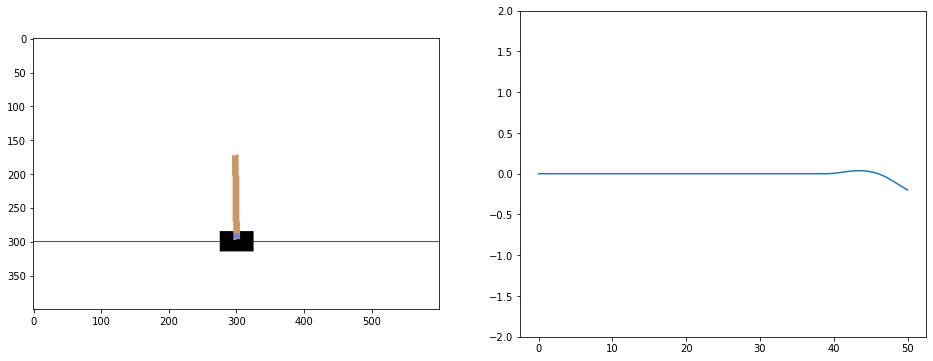

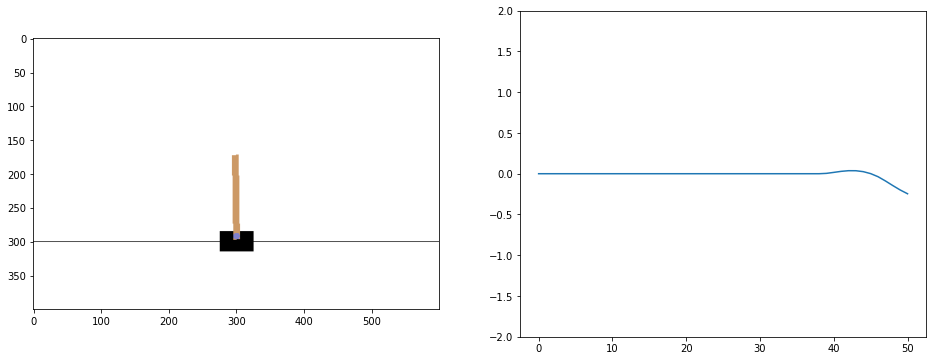

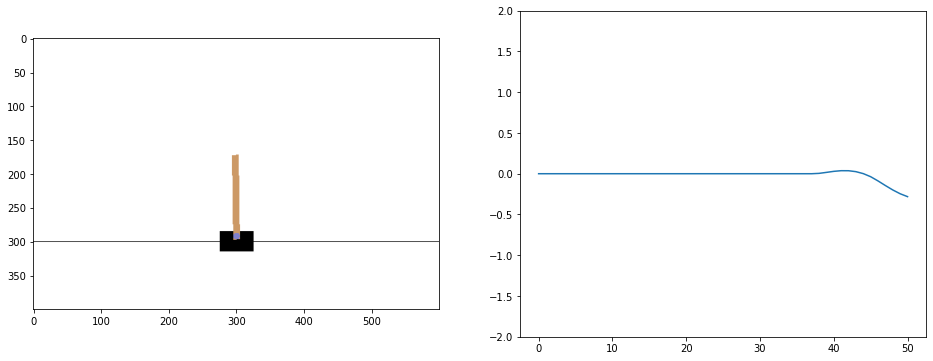

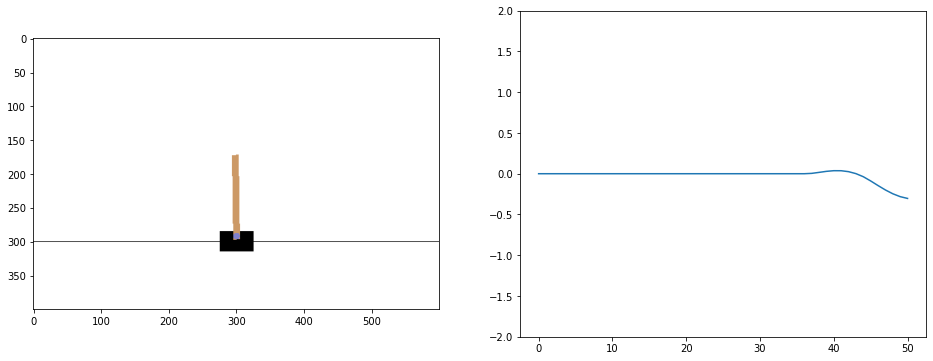

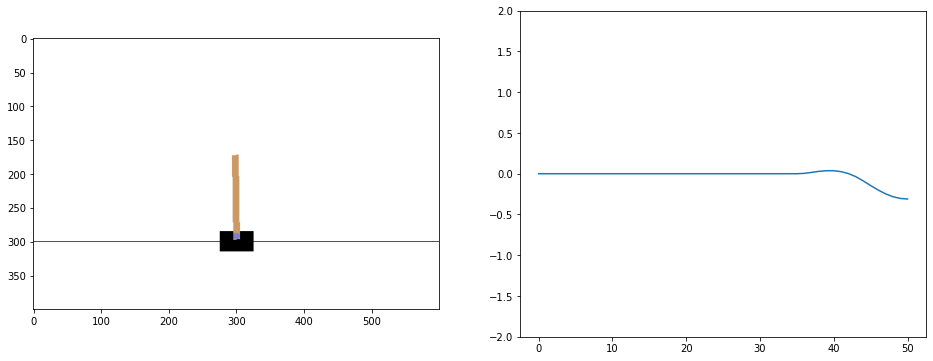

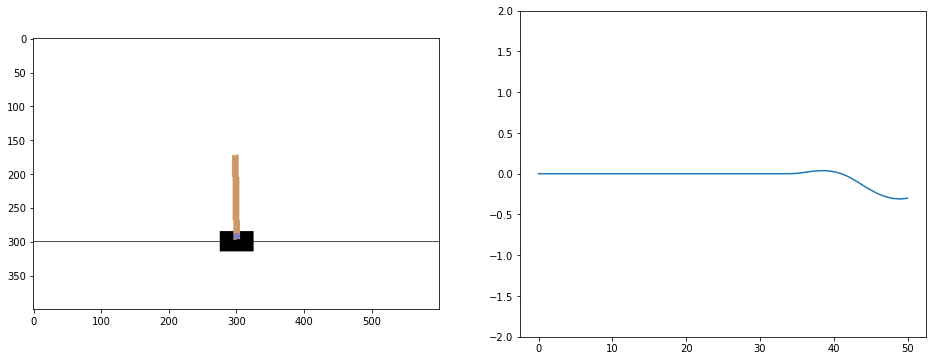

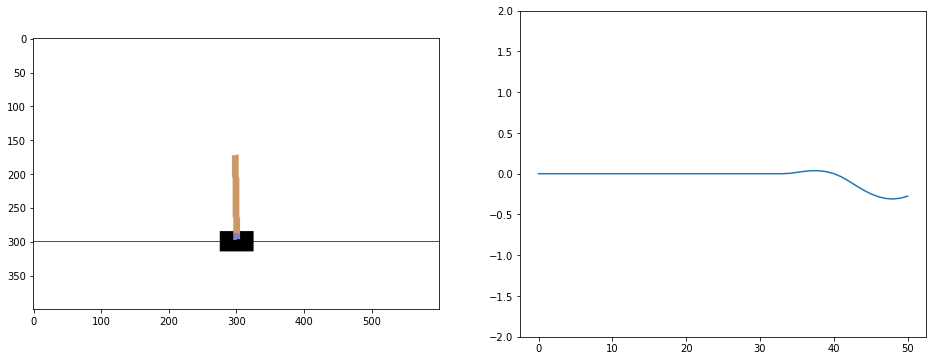

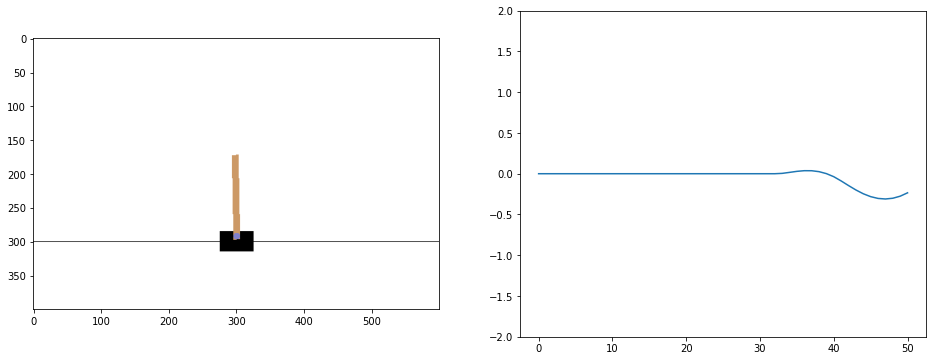

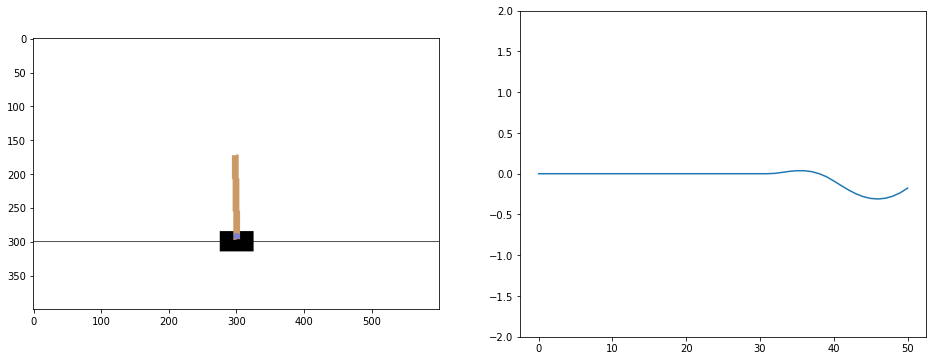

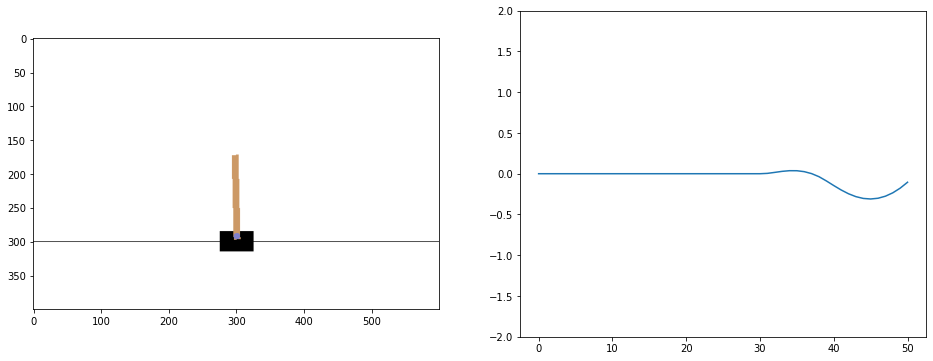

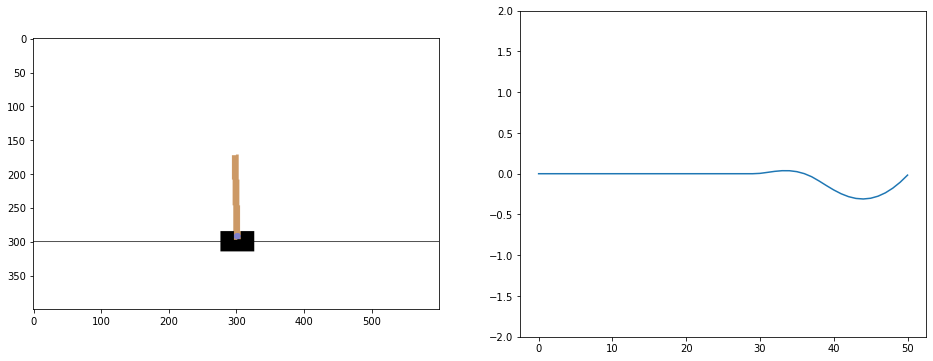

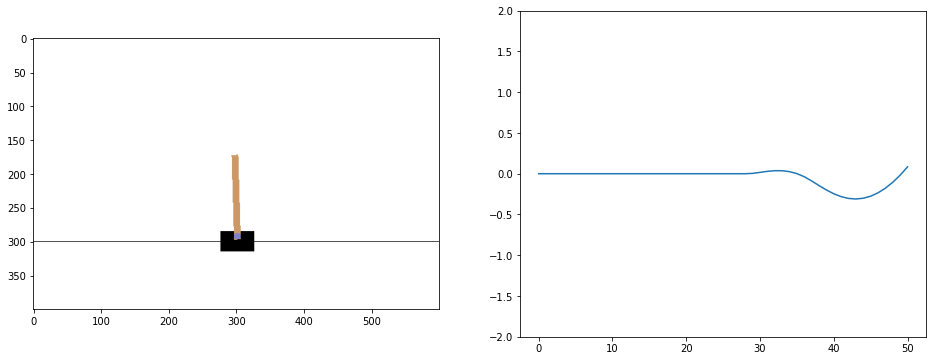

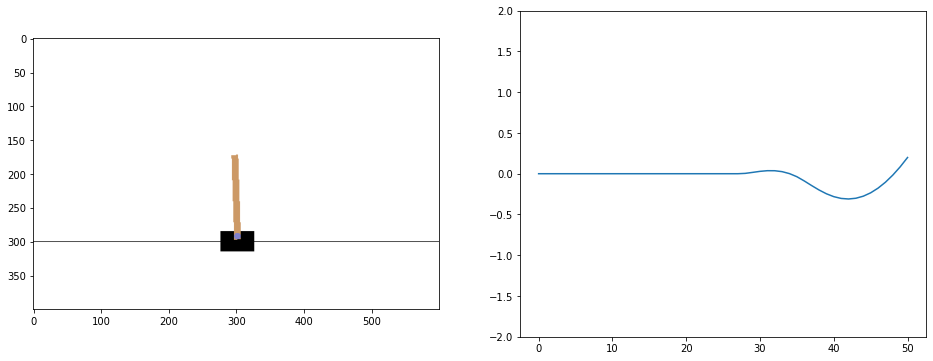

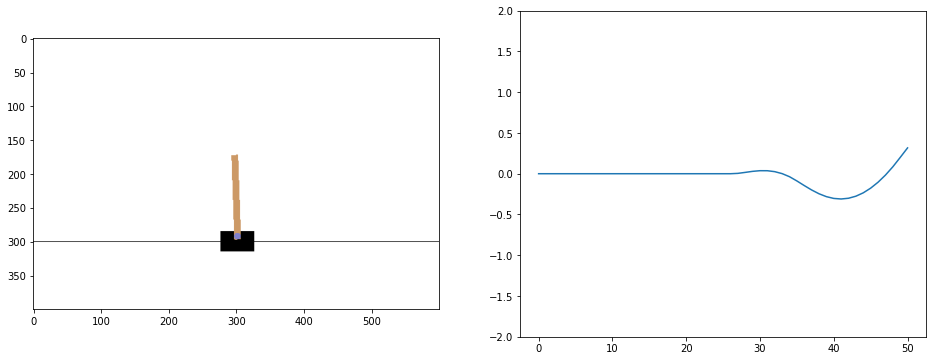

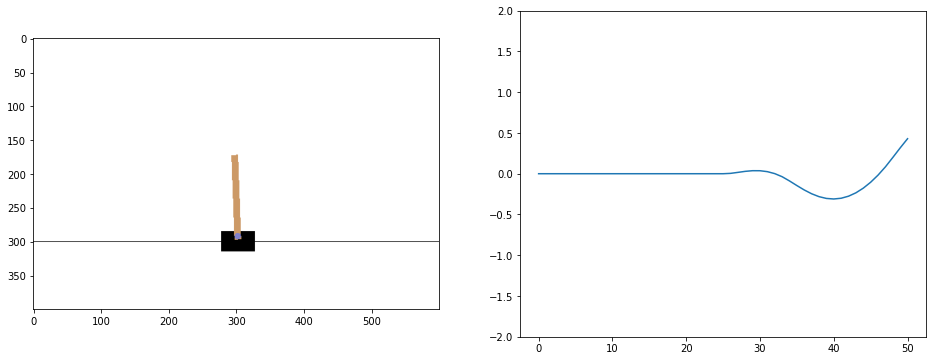

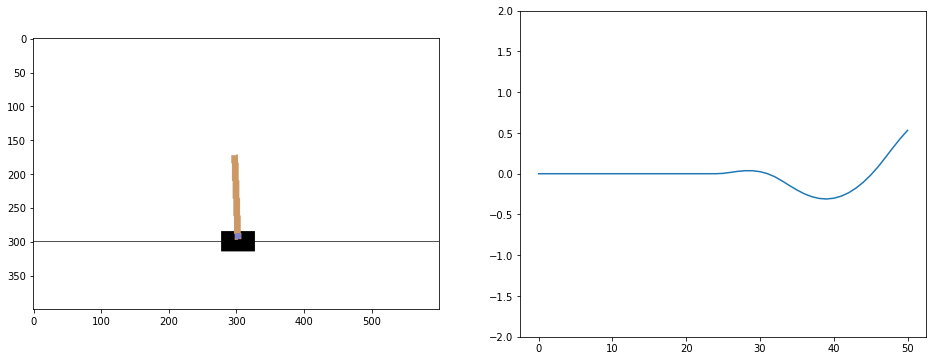

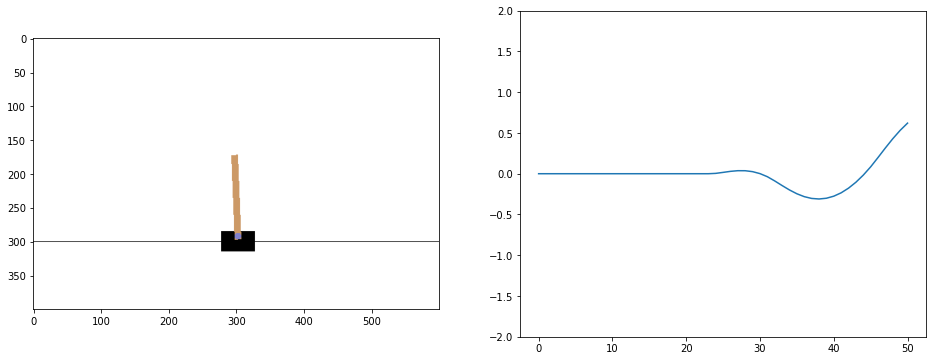

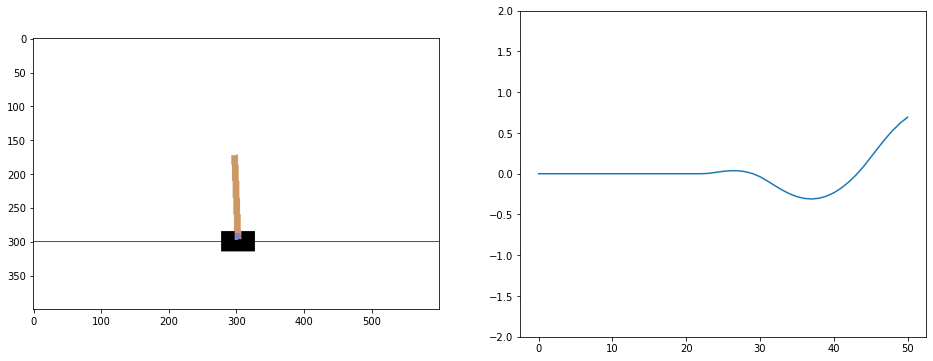

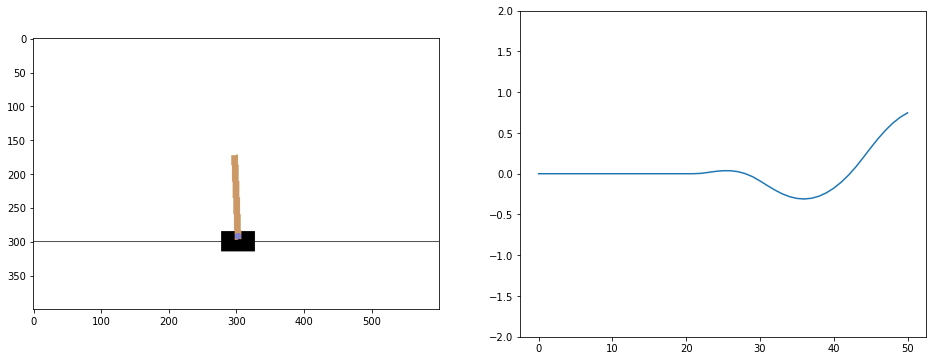

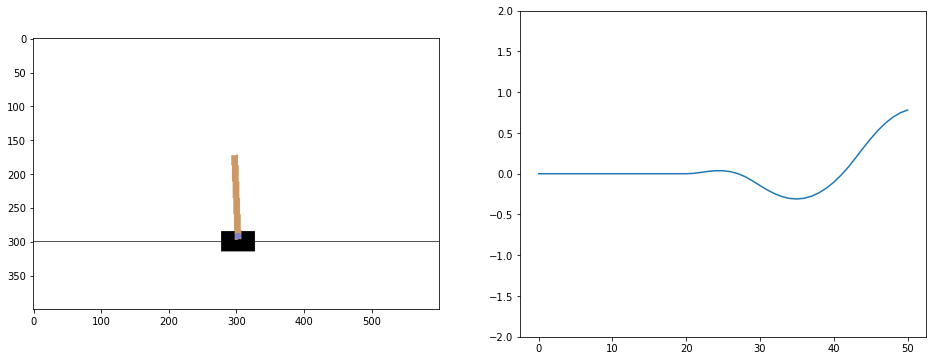

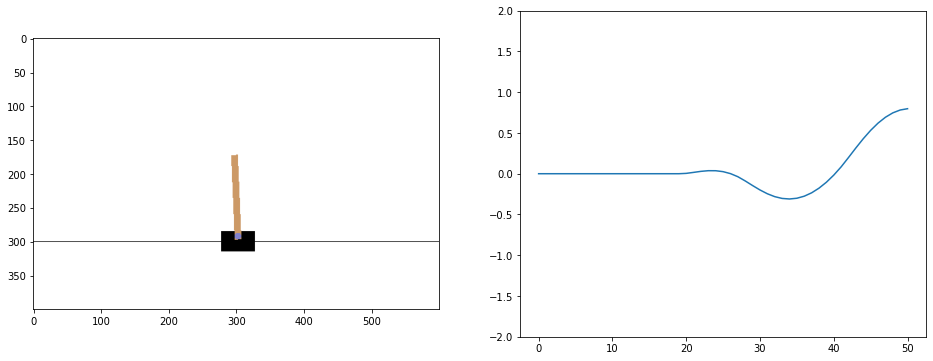

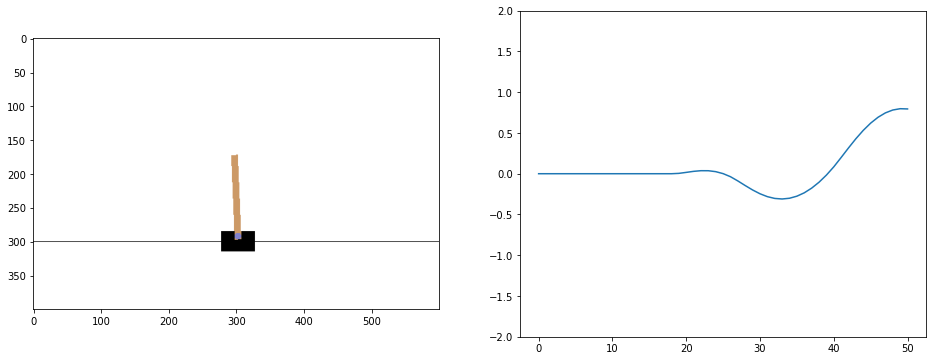

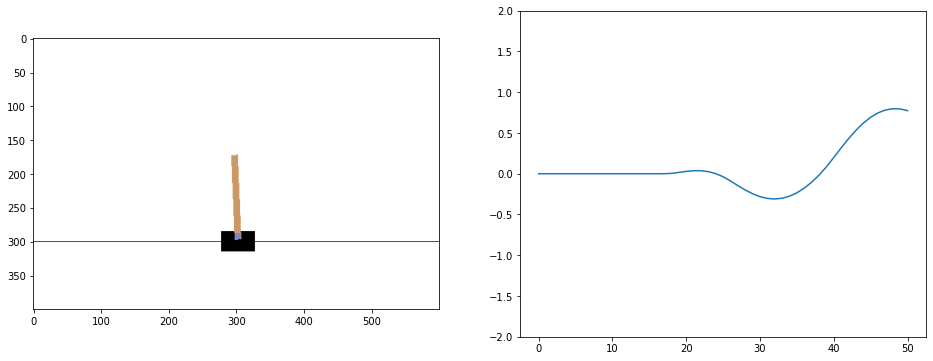

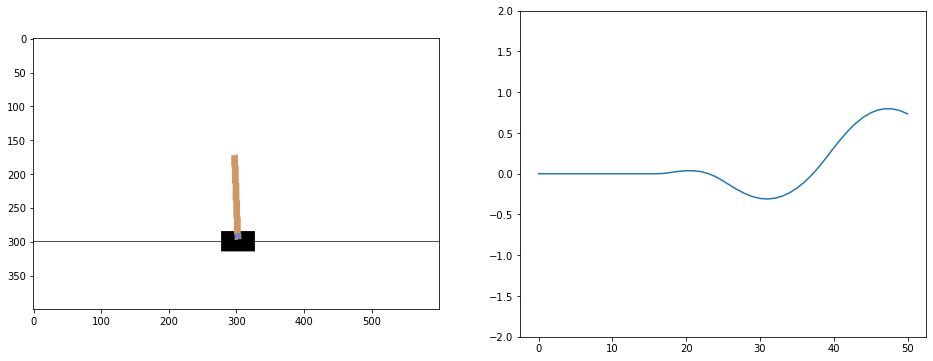

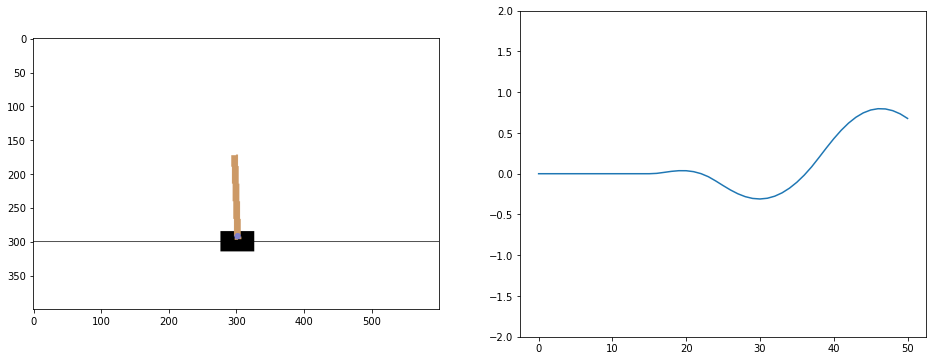

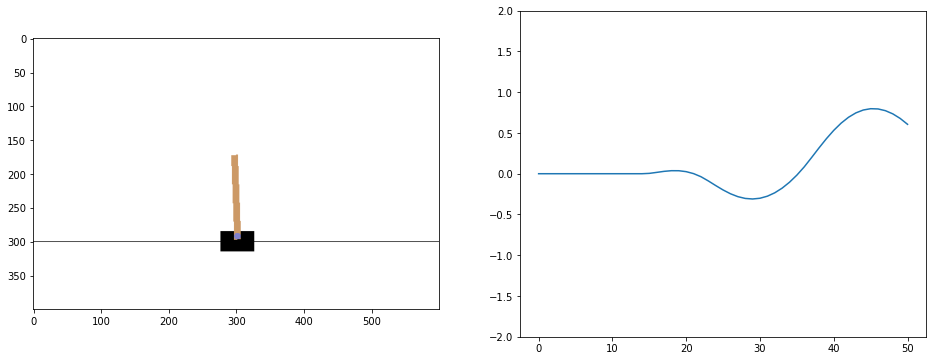

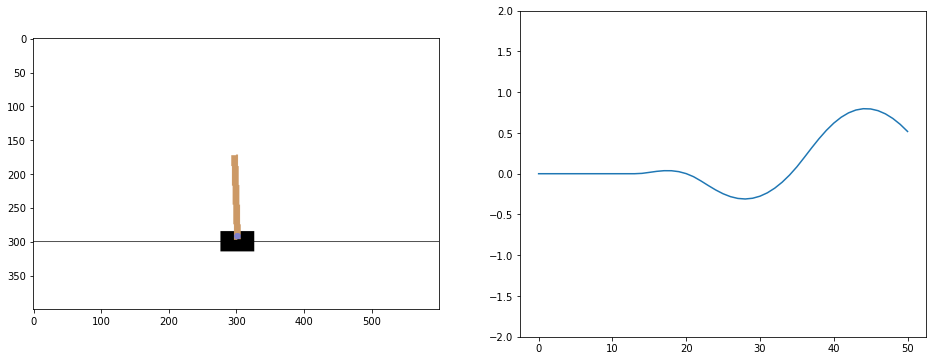

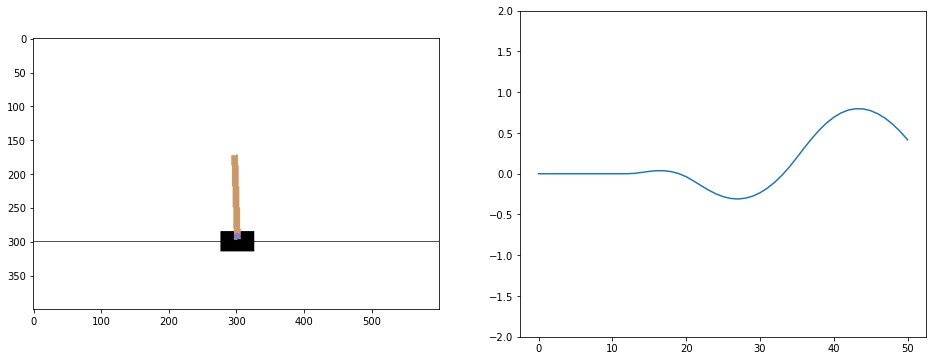

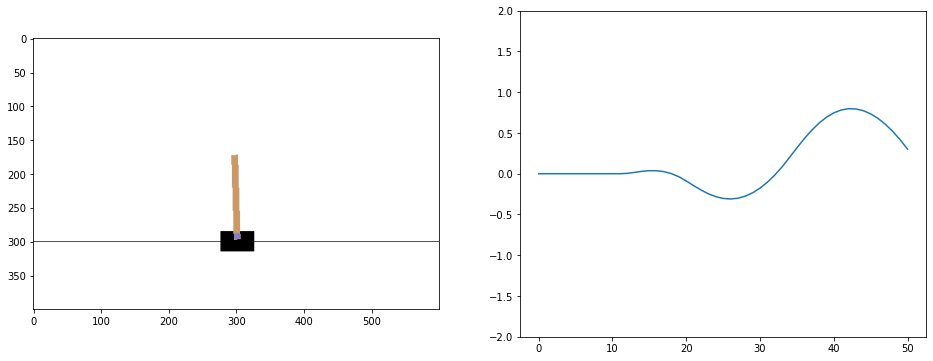

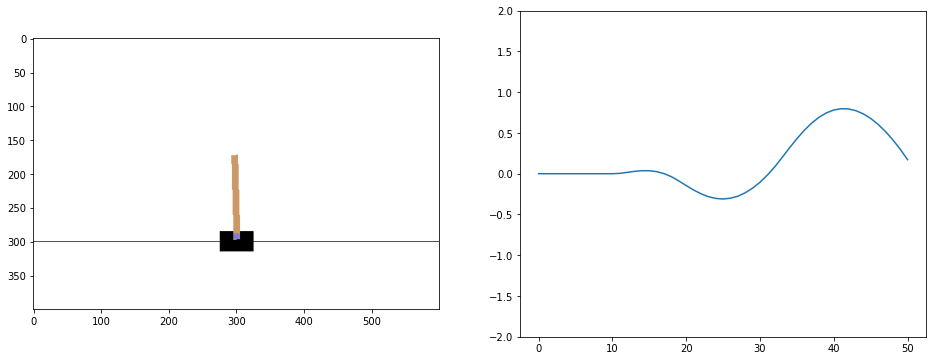

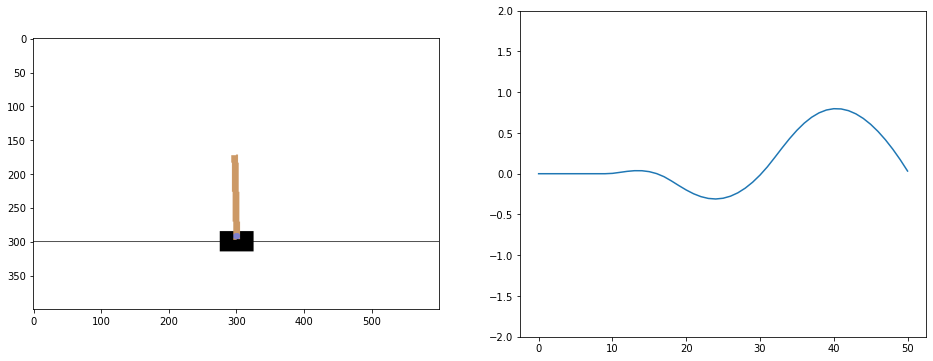

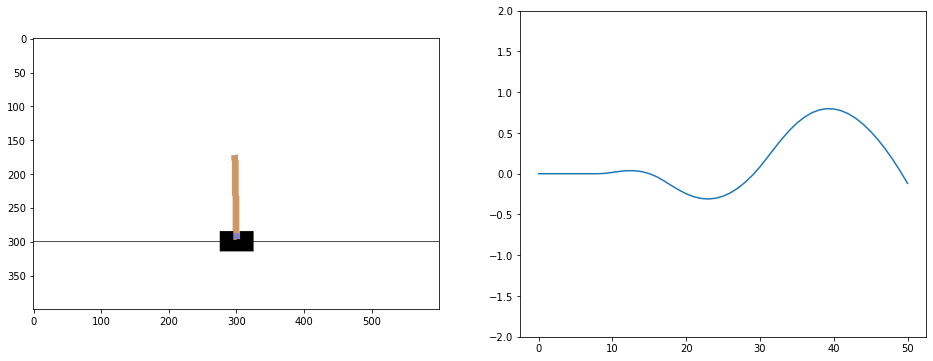

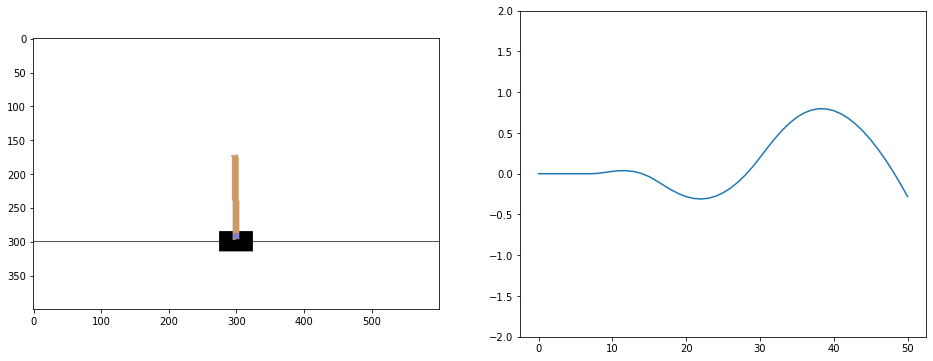

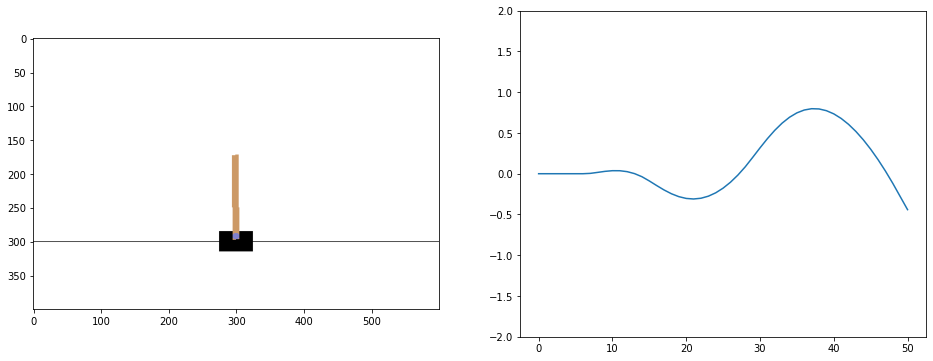

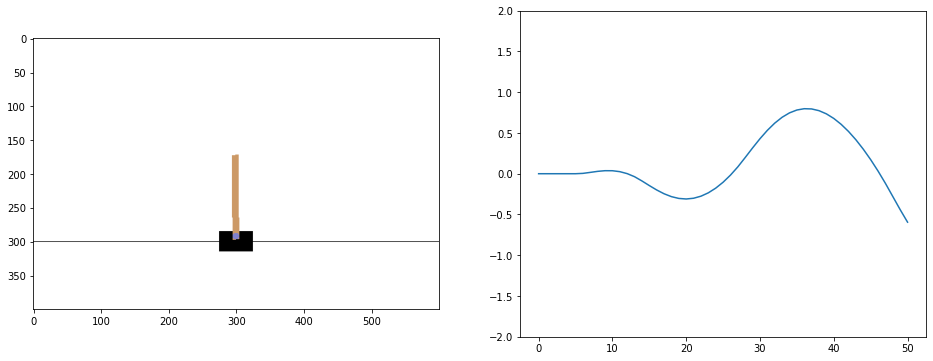

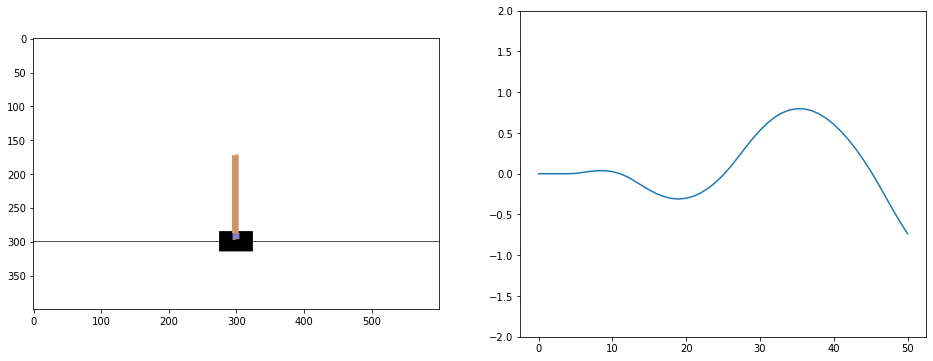

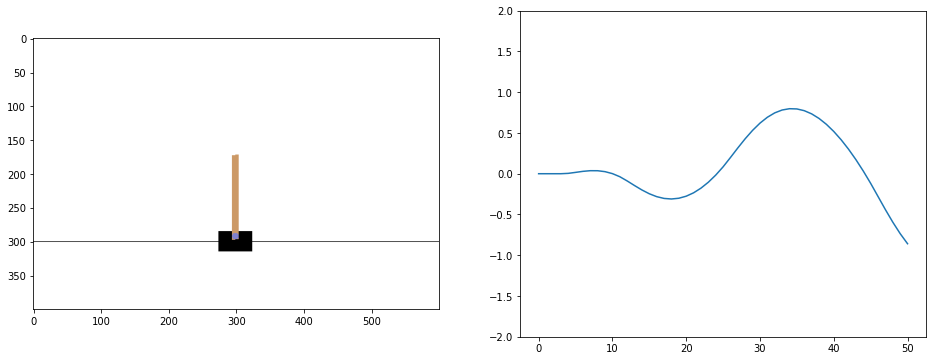

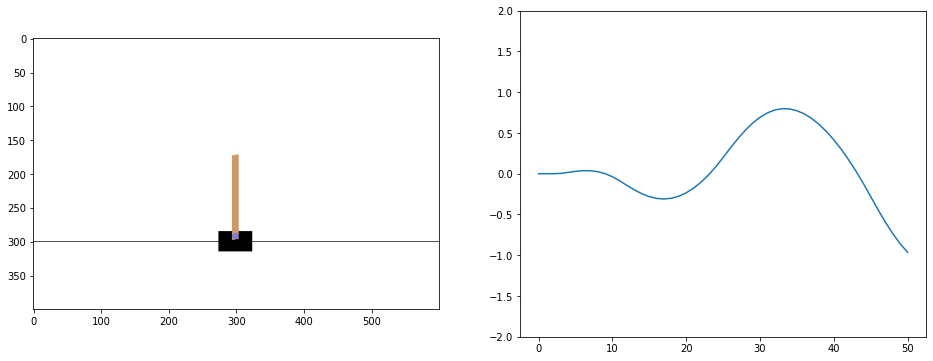

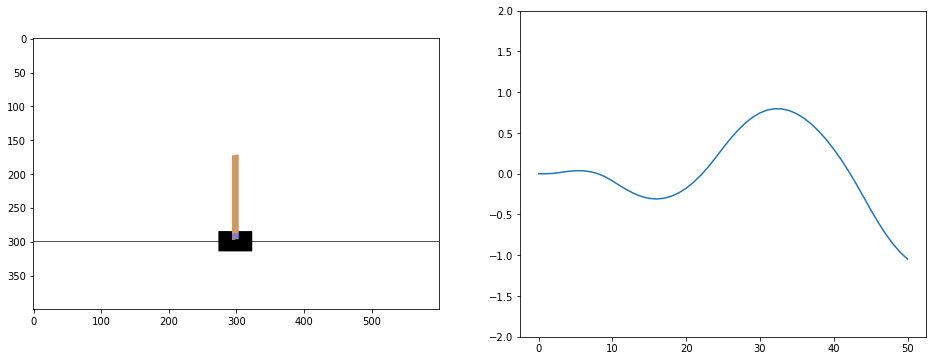

/home/jens/norse-rl/.venv/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)


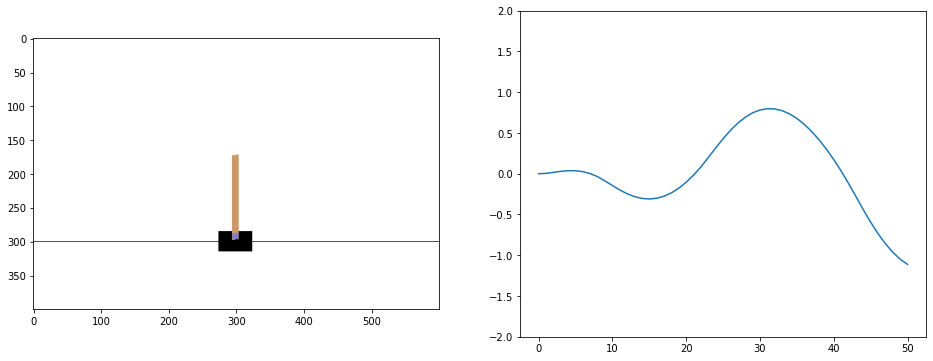

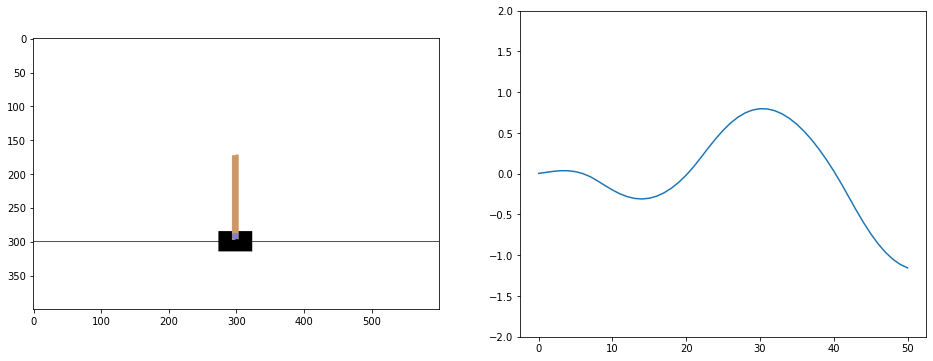

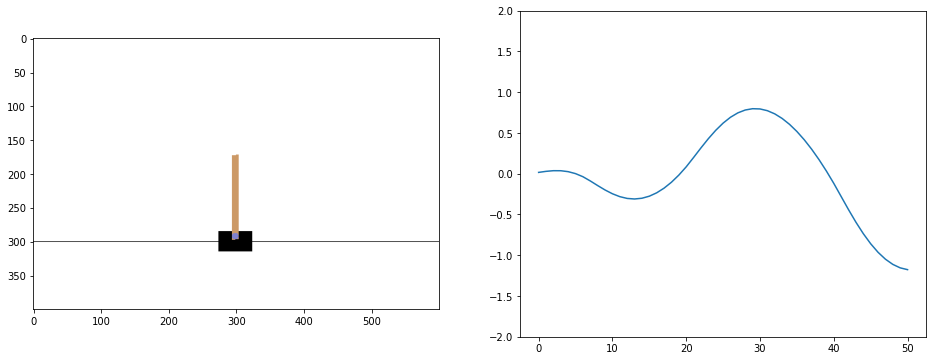

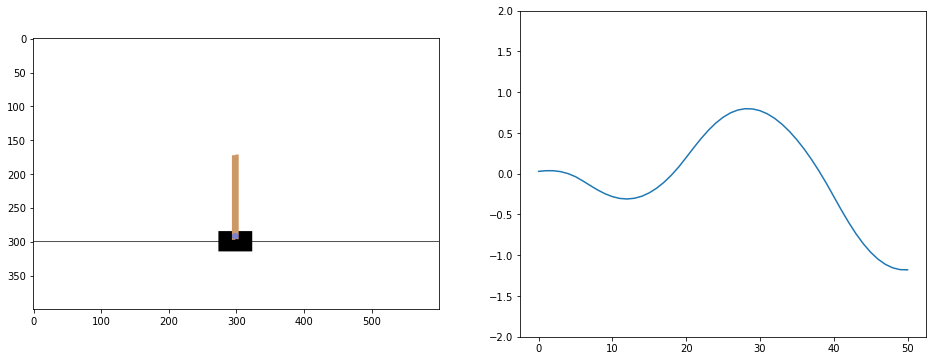

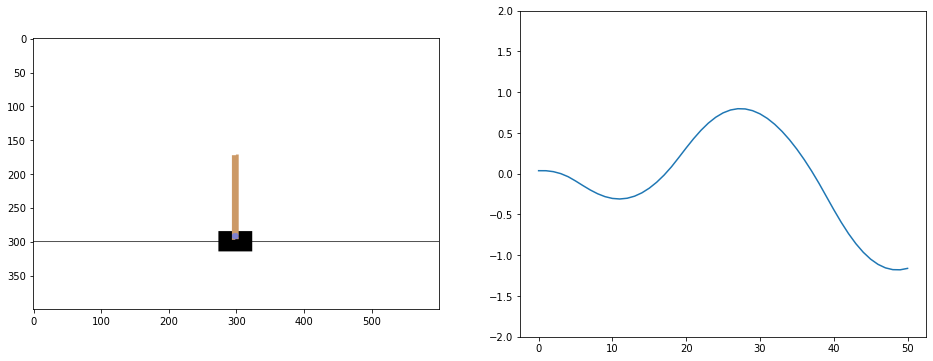

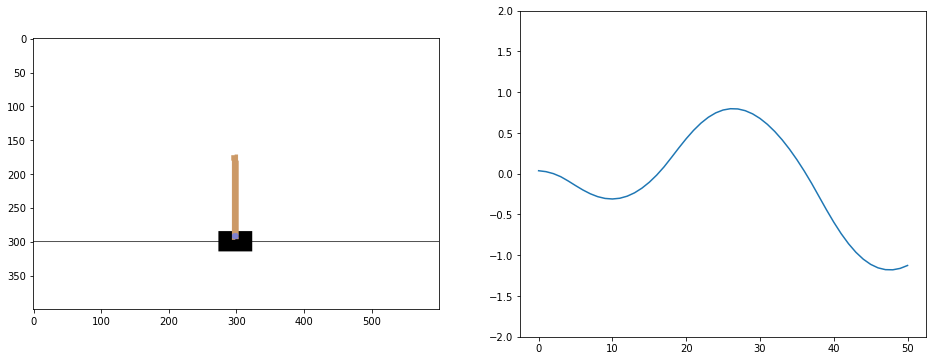

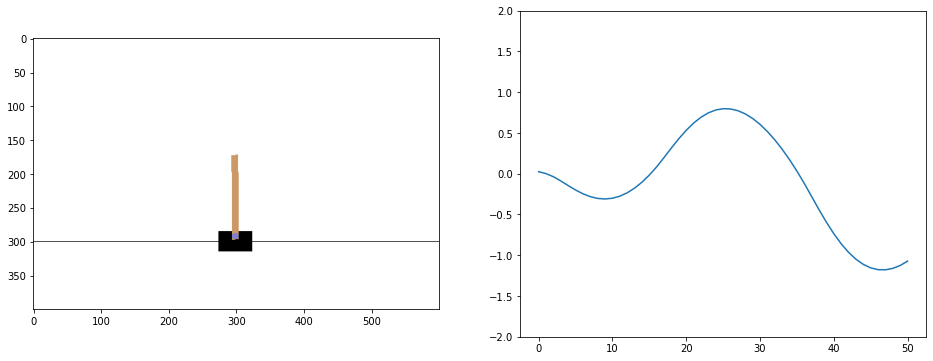

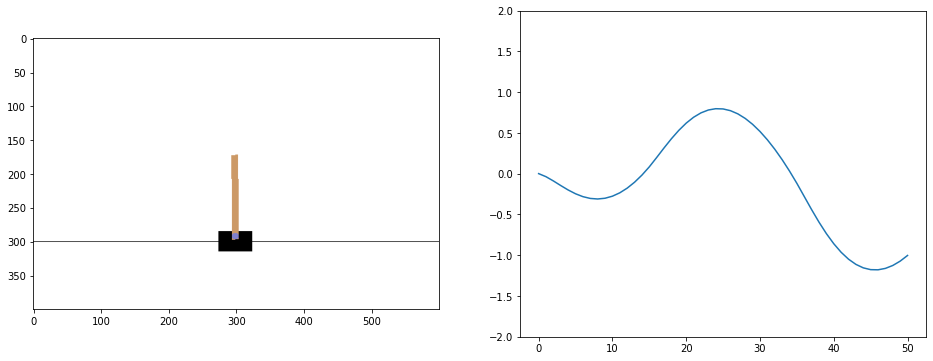

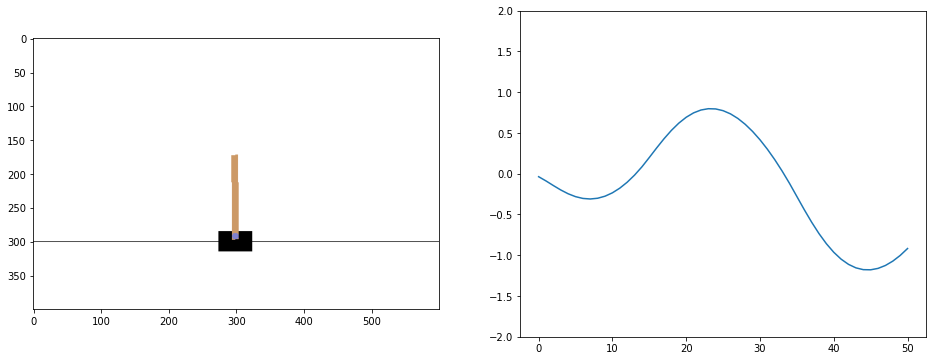

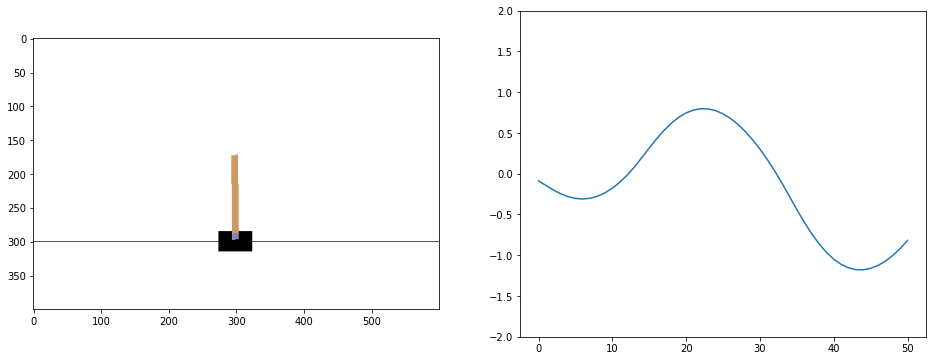

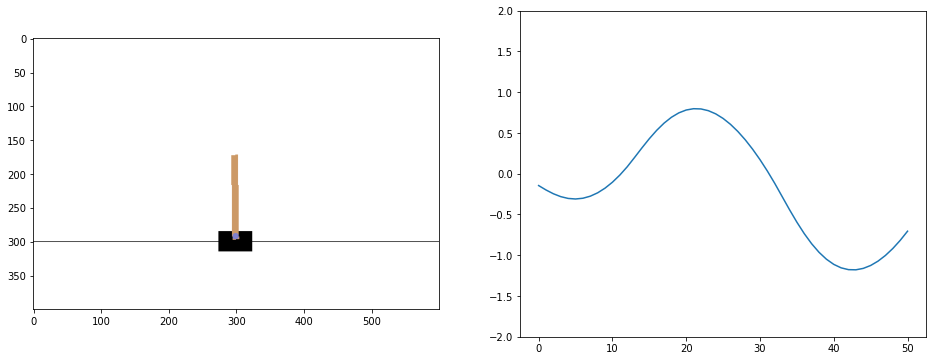

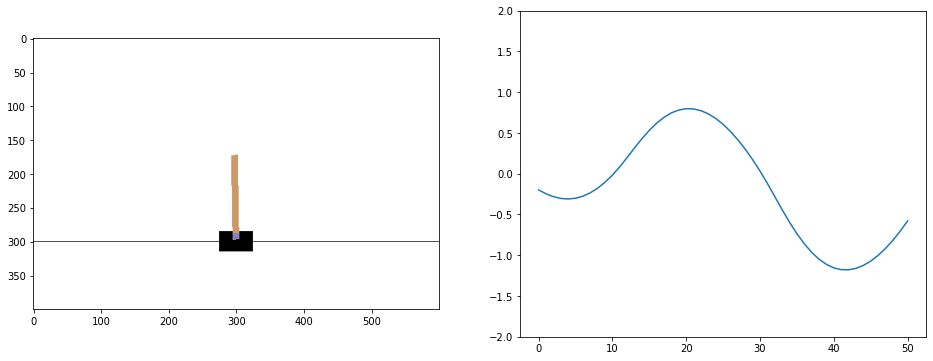

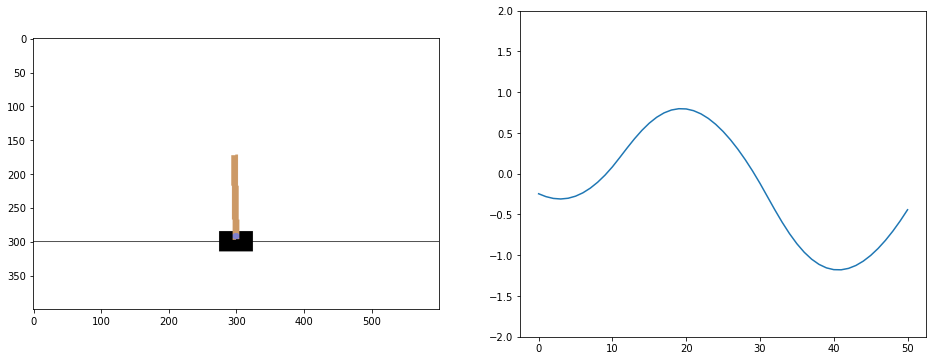

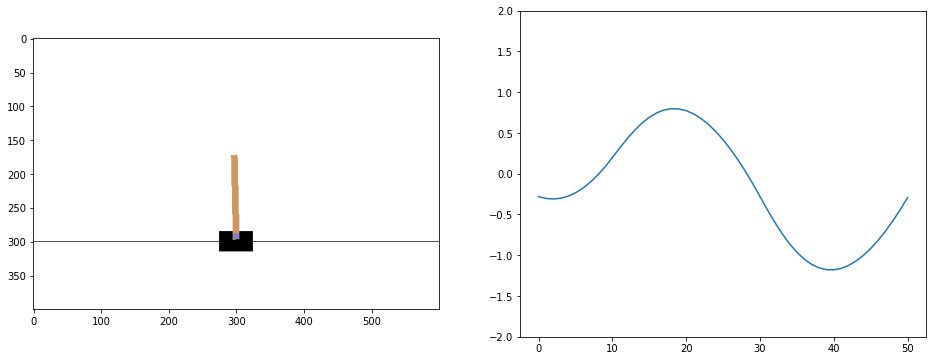

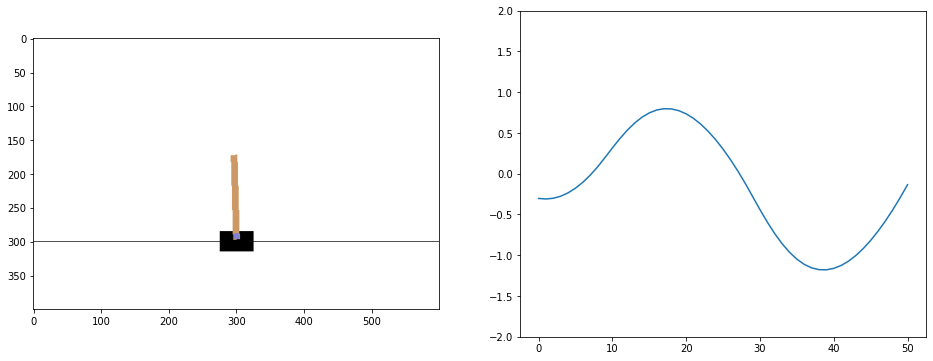

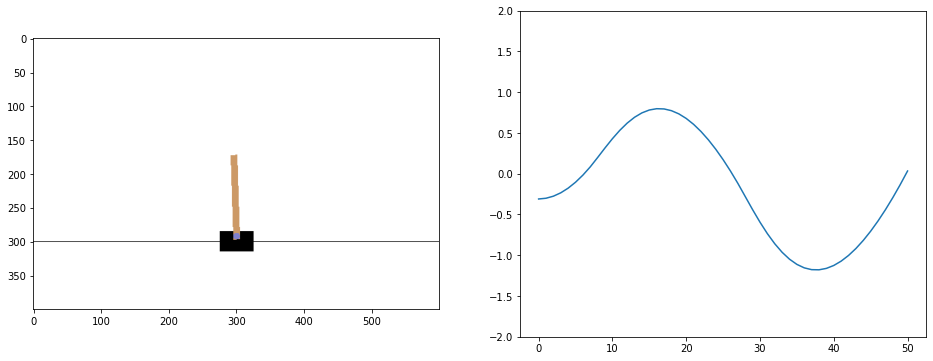

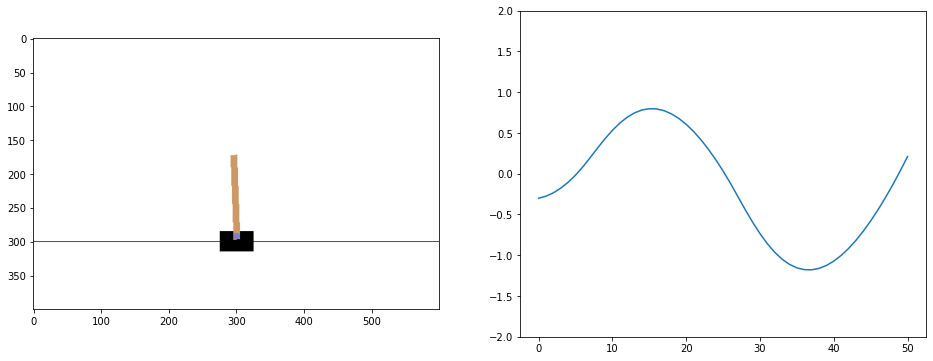

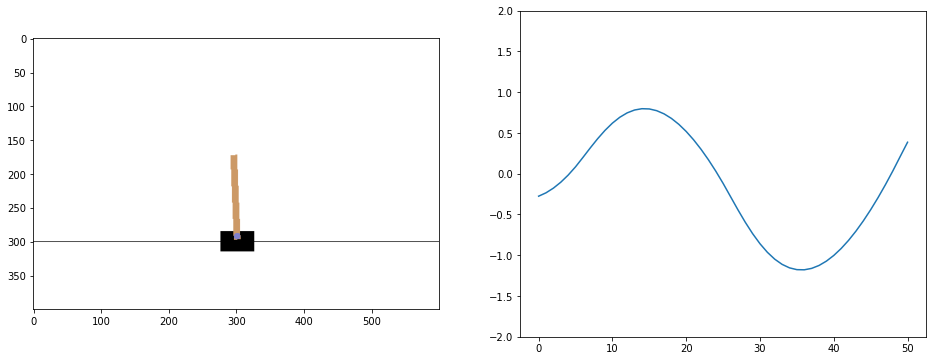

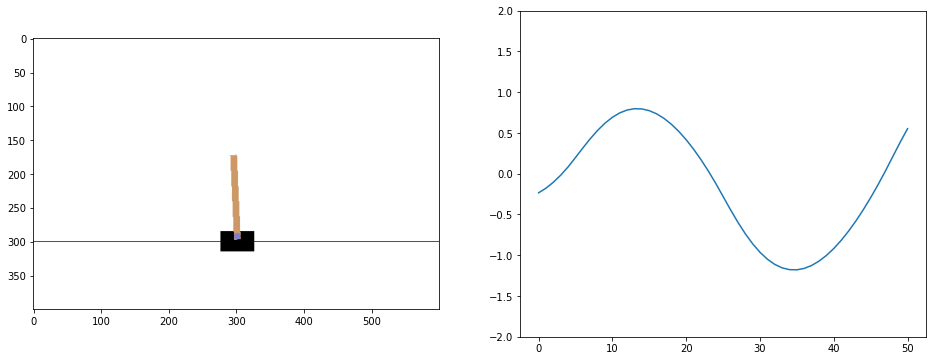

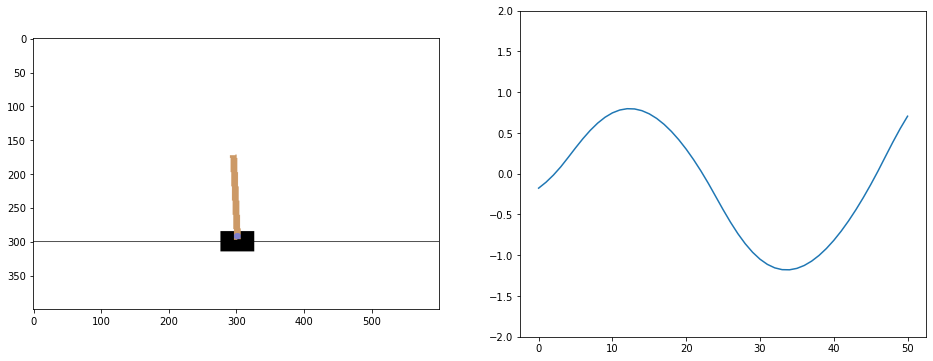

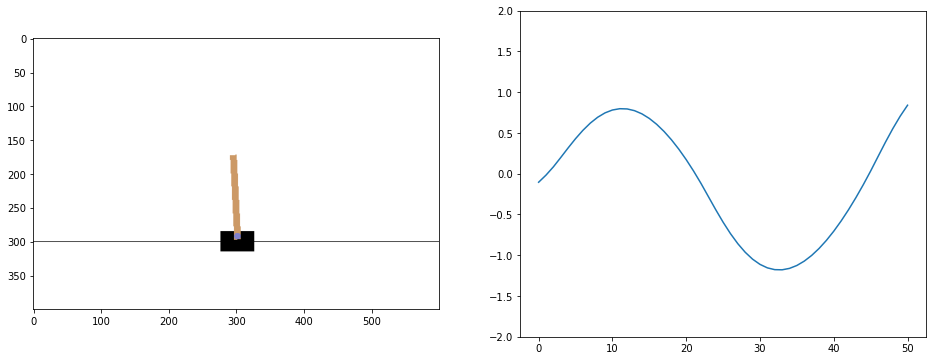

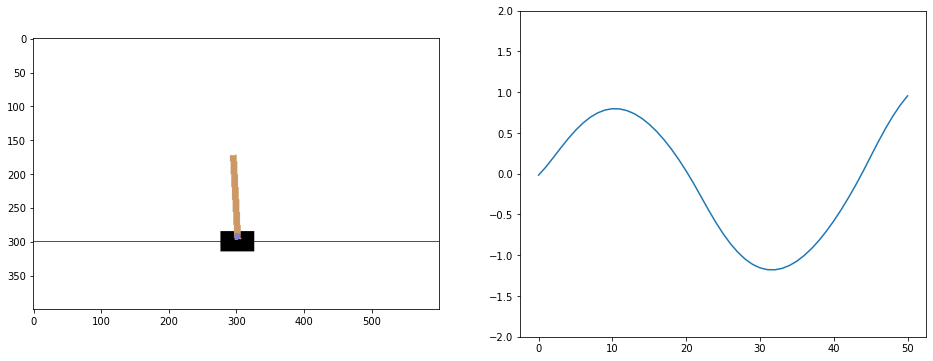

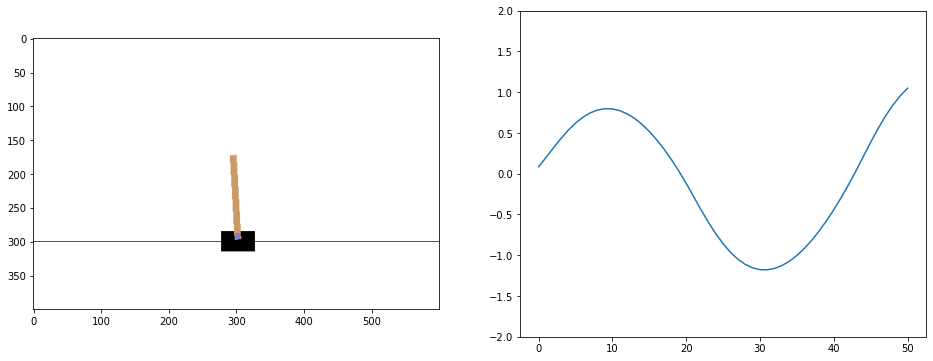

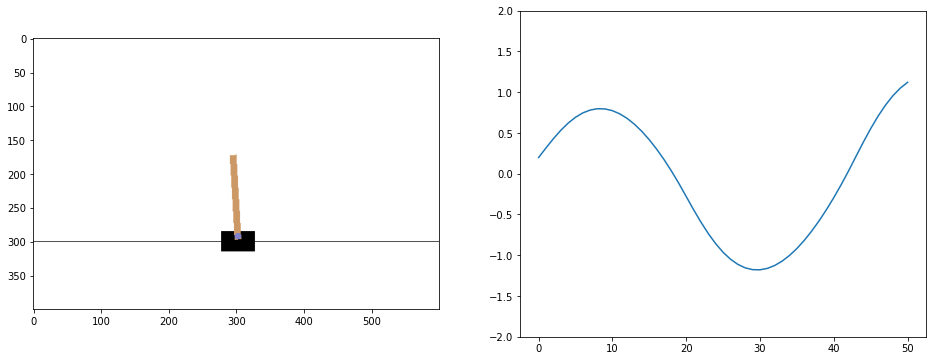

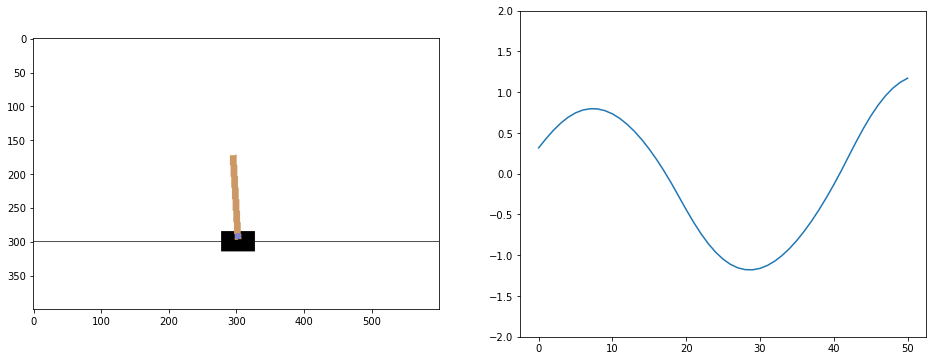

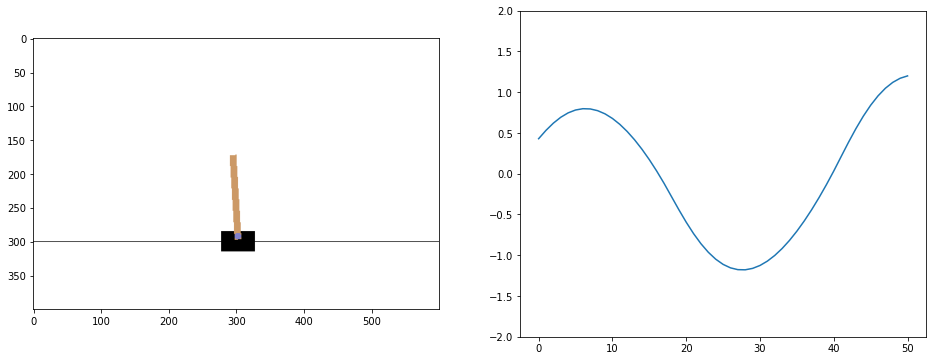

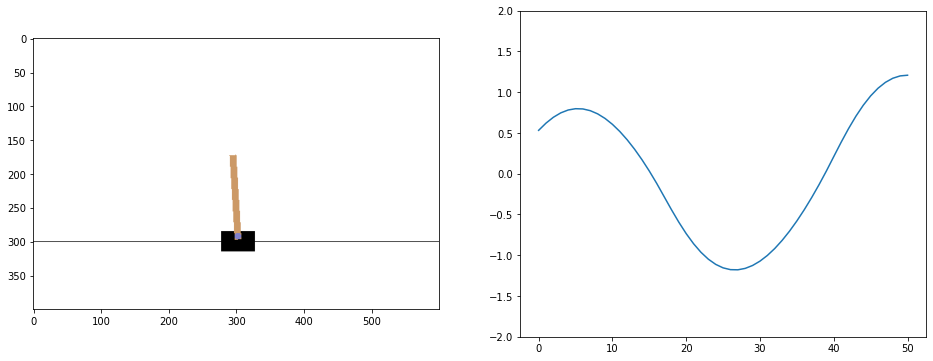

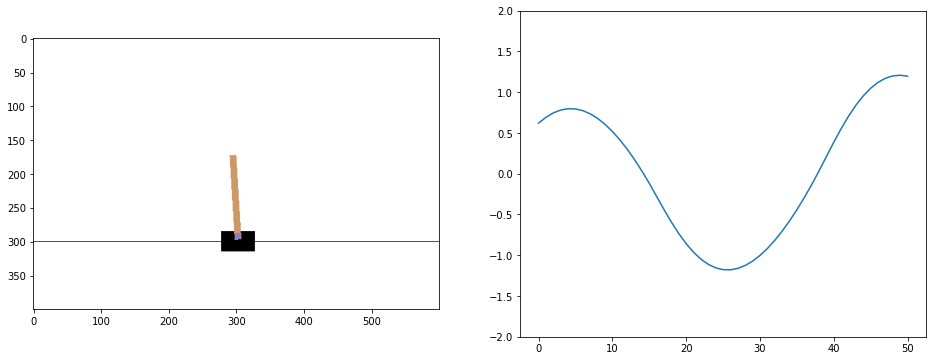

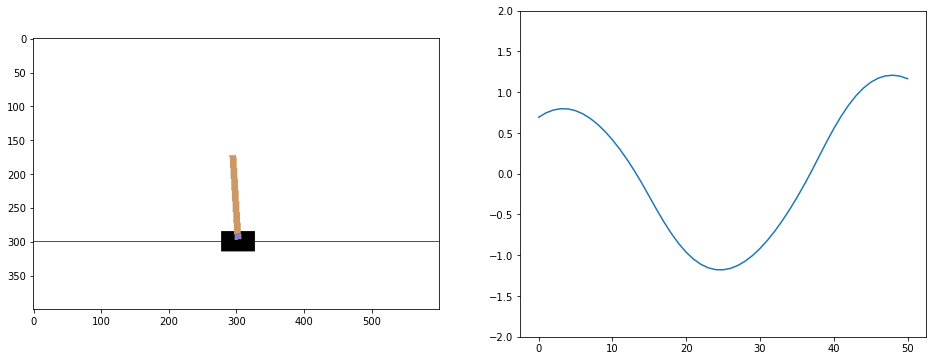

KeyboardInterrupt: 

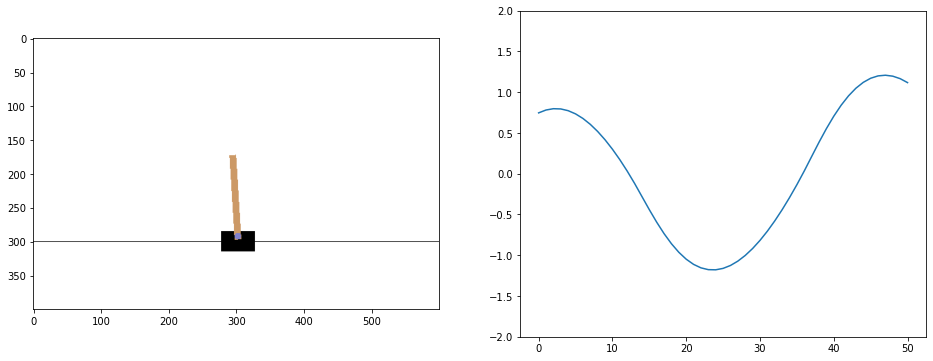

In [10]:

observation = env.reset()
state = None
is_done = False
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
img = ax1.imshow(env.render(mode='rgb_array')) # only call this once
vs = [0] * 50
while not is_done:
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(f)
    action, state = ask_network(observation, state)
    vs.append(state[-1].v.detach())
    ax2.clear()
    ax2.set_ylim(-2, 2)
    ax2.plot(vs)
    if len(vs) > 49:
        vs = vs[1:]
    observation, _, is_done, _ = env.step(action)